In [28]:
import pandas as pd

stock_code_lis = [
    '002195', 
    '002223', 
    '002912', 
    '002987',
    '300033',
    '300662',
    '301236', 
    '601998', 
    '605398', 
    '688590'
]

df = pd.DataFrame(stock_code_lis, columns=['code'])

df.head()

,code
0,002195
1,002223
2,002912
3,002987
4,300033


In [29]:
df_merge = pd.read_csv('df_merge.csv')

df_merge.head()

,Unnamed: 0,company,job,city,min_salary,max_salary,education,financing,insurance,bonus,...,train,min_experience,max_experience,min_size,max_size,aggregate_market_value,capital_stock_in_circulation,code,total_stock_issue,traded_market_value
0,0,岩山科技,python开发工程师,上海,28000.0,35000.0,本科,不需要融资,Y,Y,...,N,5,10,500,2000,3306658.95,561304.90,2195,568154.46,3266794.52
1,1,中新赛克,Python开发工程师,南京,14000.0,20000.0,本科,未知,N,N,...,N,3,5,0,208000,397510.66,16222.20,2912,17075.20,377652.84
2,2,鱼跃医疗,python开发工程师,南京,12000.0,24000.0,本科,不需要融资,N,N,...,N,3,5,2000,208000,3551775.76,94015.82,2223,100247.69,3330980.38
3,3,同花顺,python开发,杭州,15000.0,25000.0,本科,上市公司,N,N,...,N,1,3,2000,208000,13971148.80,27550.56,300033,53760.00,7159839.04
4,4,京北方,python开发,北京,14000.0,17000.0,本科,上市公司,N,N,...,N,3,5,2000,208000,1178195.96,60246.04,2987,61977.69,1145277.31


In [30]:
# 将code附上名字

df['original_code'] = df['code']
df['code'] = df['code'].str.lstrip('0').astype(int)
df = df.merge(df_merge[['code', 'company']], on='code', how='inner')
df['code'] = df['original_code']
df = df.drop(columns=['original_code'])
df = df.drop_duplicates()

df

,code,company
0,002195,岩山科技
1,002223,鱼跃医疗
2,002912,中新赛克
3,002987,京北方
5,300033,同花顺
6,300662,科锐国际
17,301236,软通动力
19,601998,中信银行
20,605398,新炬网络
21,688590,新致软件


In [31]:
stats_lis = []

for code in stock_code_lis:
    file_path = f"{code}.csv"
    
    stock_df = pd.read_csv(file_path)
    
    stock_df = stock_df.dropna(subset=['开盘', '收盘', '最高', '最低'])
    
    open_avg = stock_df['开盘'].mean()
    close_avg = stock_df['收盘'].mean()
    high_avg = stock_df['最高'].mean()
    low_avg = stock_df['最低'].mean()
    
    open_max = stock_df['开盘'].max()
    close_max = stock_df['收盘'].max()
    high_max = stock_df['最高'].max()
    low_max = stock_df['最低'].max()
    
    open_min = stock_df['开盘'].min()
    close_min = stock_df['收盘'].min()
    high_min = stock_df['最高'].min()
    low_min = stock_df['最低'].min()
    
    stats_lis.append({
        'code': code,
        'company': df[df['code'] == code]['company'].values[0],
        'open_avg': open_avg,
        'close_avg': close_avg,
        'high_avg': high_avg,
        'low_avg': low_avg,
        'open_max': open_max,
        'close_max': close_max,
        'high_max': high_max,
        'low_max': low_max,
        'open_min': open_min,
        'close_min': close_min,
        'high_min': high_min,
        'low_min': low_min
    })


stats_df = pd.DataFrame(stats_lis)

stats_df

,code,company,open_avg,close_avg,high_avg,low_avg,open_max,close_max,high_max,low_max,open_min,close_min,high_min,low_min
0,002195,岩山科技,7.623395,7.628387,7.820136,7.438741,73.77,74.10,77.10,69.30,1.58,1.64,1.73,1.58
1,002223,鱼跃医疗,30.218936,30.241549,30.776663,29.708501,72.70,71.10,73.40,67.80,15.60,15.91,16.27,15.53
2,002912,中新赛克,62.147663,62.229059,63.710592,60.824585,199.89,199.90,205.88,195.51,14.58,14.56,14.90,14.37
3,002987,京北方,29.220983,29.247727,29.911273,28.608736,80.00,77.11,83.99,74.95,9.11,9.13,9.32,9.08
4,300033,同花顺,106.570107,106.854241,109.521078,104.391518,360.00,344.48,364.99,334.23,29.02,28.80,29.77,28.48
5,300662,科锐国际,36.437803,36.447835,37.317060,35.610118,69.29,69.09,70.82,67.38,7.86,9.43,9.43,7.86
6,301236,软通动力,41.934097,41.979289,43.246851,40.935560,78.80,75.99,80.50,73.90,19.60,19.60,20.43,19.05
7,601998,中信银行,5.896663,5.904539,5.970432,5.832630,10.28,10.28,10.50,9.60,4.27,4.25,4.28,4.25
8,605398,新炬网络,32.026721,32.050725,32.724758,31.378549,79.30,79.30,79.30,79.30,13.69,13.85,13.99,13.63
9,688590,新致软件,16.473340,16.457636,16.960582,16.030235,33.60,30.08,33.60,29.50,8.62,8.64,8.75,8.57


In [32]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score, davies_bouldin_score

features = ['open_avg', 'close_avg', 'high_avg', 'low_avg', 
            'open_max', 'close_max', 'high_max', 'low_max', 
            'open_min', 'close_min', 'high_min', 'low_min']

scaler = StandardScaler()
scaled_features = scaler.fit_transform(stats_df[features])

K = 3

kmeans = KMeans(n_clusters=K, n_init='auto', random_state=42)
stats_df['cluster'] = kmeans.fit_predict(scaled_features)
print("聚类结果：")
print(stats_df[['code', 'company', 'cluster']])

# 评估聚类效果
silhouette_avg = silhouette_score(scaled_features, stats_df['cluster'])
davies_bouldin = davies_bouldin_score(scaled_features, stats_df['cluster'])
print("\n聚类效果评估：")
print(f"轮廓系数（Silhouette Score）: {silhouette_avg:.2f}")
print(f"Davies-Bouldin 指数: {davies_bouldin:.2f}")

聚类结果：
     code company  cluster
0  002195    岩山科技        0
1  002223    鱼跃医疗        2
2  002912    中新赛克        2
3  002987     京北方        0
4  300033     同花顺        1
5  300662    科锐国际        0
6  301236    软通动力        2
7  601998    中信银行        0
8  605398    新炬网络        2
9  688590    新致软件        0

聚类效果评估：
轮廓系数（Silhouette Score）: 0.34
Davies-Bouldin 指数: 0.63


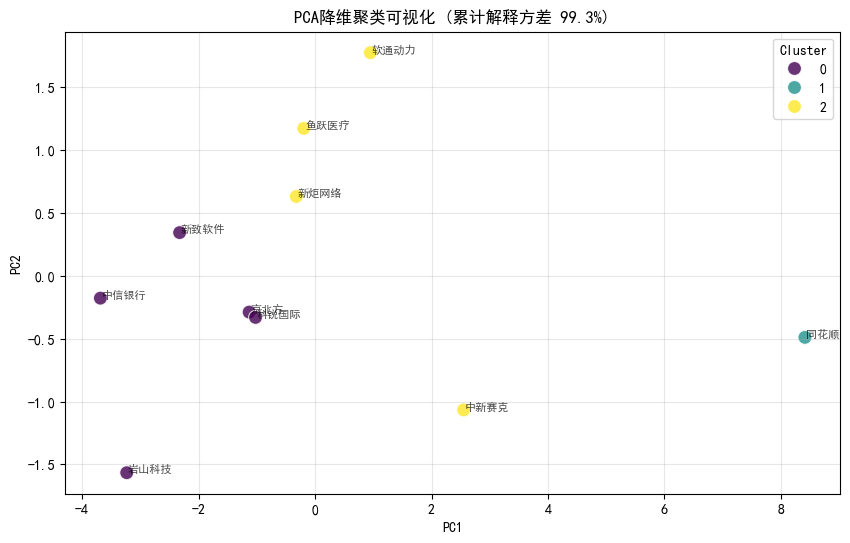

In [33]:
from sklearn.decomposition import PCA
import seaborn as sns

import matplotlib.pyplot as plt

plt.rcParams['font.family'] = 'SimHei'
plt.rcParams['axes.unicode_minus'] = False

# 执行PCA降维
pca = PCA(n_components=2)
pca_features = pca.fit_transform(scaled_features)

# 创建可视化DataFrame
plot_df = pd.DataFrame({
    'PC1': pca_features[:,0],
    'PC2': pca_features[:,1],
    'Cluster': stats_df['cluster'],
    'Company': stats_df['company']
})

# 绘制PCA散点图
plt.figure(figsize=(10,6))
sns.scatterplot(data=plot_df, x='PC1', y='PC2', hue='Cluster', 
                palette='viridis', s=100, alpha=0.8)
plt.title("PCA降维聚类可视化 (累计解释方差 {:.1%})".format(pca.explained_variance_ratio_.sum()))
plt.grid(alpha=0.3)

# 添加公司标签
for line in range(0, plot_df.shape[0]):
    plt.text(plot_df.PC1[line]+0.02, plot_df.PC2[line], 
             plot_df.Company[line], horizontalalignment='left', 
             fontsize=8, color='black', alpha=0.7)

plt.show()

In [34]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score, davies_bouldin_score

features = ['open_avg', 'close_avg', 'high_avg', 'low_avg', 
            'open_max', 'close_max', 'high_max', 'low_max', 
            'open_min', 'close_min', 'high_min', 'low_min']

scaler = StandardScaler()
scaled_features = scaler.fit_transform(stats_df[features])

dbscan = DBSCAN(eps=1.1, min_samples=2) 
stats_df['cluster'] = dbscan.fit_predict(scaled_features)

print("聚类结果：")
print(stats_df[['code', 'company', 'cluster']])

# 评估聚类效果
# DBSCAN 的聚类结果可能包含噪声点（标记为 -1），因此需要过滤掉噪声点
filtered_df = stats_df[stats_df['cluster'] != -1]
if len(filtered_df) > 0:
    silhouette_avg = silhouette_score(scaled_features[filtered_df.index], filtered_df['cluster'])
    davies_bouldin = davies_bouldin_score(scaled_features[filtered_df.index], filtered_df['cluster'])
    print("\n聚类效果评估：")
    print(f"轮廓系数（Silhouette Score）: {silhouette_avg:.2f}")
    print(f"Davies-Bouldin 指数: {davies_bouldin:.2f}")
else:
    print("\n聚类效果评估：")
    print("没有有效的聚类结果，无法计算评估指标。")

聚类结果：
     code company  cluster
0  002195    岩山科技       -1
1  002223    鱼跃医疗        0
2  002912    中新赛克       -1
3  002987     京北方        1
4  300033     同花顺       -1
5  300662    科锐国际        1
6  301236    软通动力       -1
7  601998    中信银行       -1
8  605398    新炬网络        0
9  688590    新致软件       -1

聚类效果评估：
轮廓系数（Silhouette Score）: 0.62
Davies-Bouldin 指数: 0.38


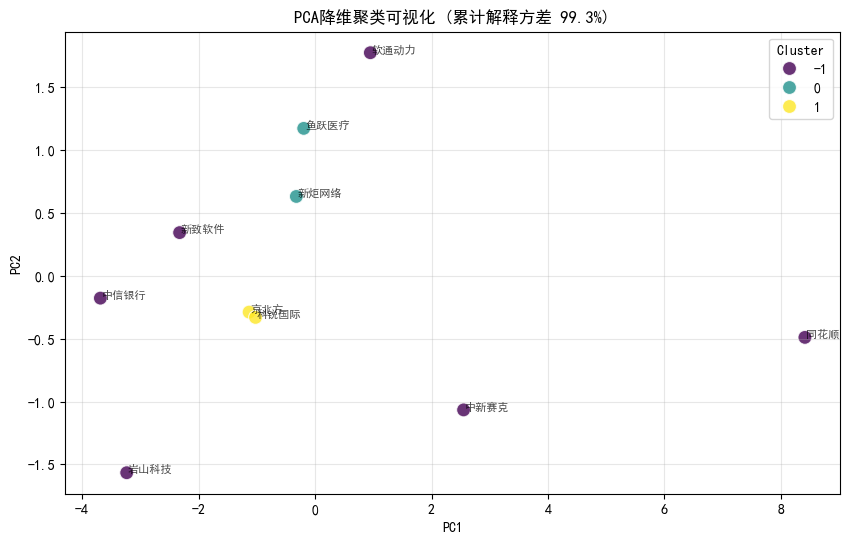

In [35]:
# 执行PCA降维
pca = PCA(n_components=2)
pca_features = pca.fit_transform(scaled_features)

# 创建可视化DataFrame
plot_df = pd.DataFrame({
    'PC1': pca_features[:,0],
    'PC2': pca_features[:,1],
    'Cluster': stats_df['cluster'],
    'Company': stats_df['company']
})

# 绘制PCA散点图
plt.figure(figsize=(10,6))
sns.scatterplot(data=plot_df, x='PC1', y='PC2', hue='Cluster', 
                palette='viridis', s=100, alpha=0.8)
plt.title("PCA降维聚类可视化 (累计解释方差 {:.1%})".format(pca.explained_variance_ratio_.sum()))
plt.grid(alpha=0.3)

# 添加公司标签
for line in range(0, plot_df.shape[0]):
    plt.text(plot_df.PC1[line]+0.02, plot_df.PC2[line], 
             plot_df.Company[line], horizontalalignment='left', 
             fontsize=8, color='black', alpha=0.7)

plt.show()

In [36]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score, davies_bouldin_score

features = ['open_avg', 'close_avg', 'high_avg', 'low_avg', 
            'open_max', 'close_max', 'high_max', 'low_max', 
            'open_min', 'close_min', 'high_min', 'low_min']

scaler = StandardScaler()
scaled_features = scaler.fit_transform(stats_df[features])

# 层次聚类
agglomerative = AgglomerativeClustering(n_clusters=3)
stats_df['cluster'] = agglomerative.fit_predict(scaled_features)

print("聚类结果：")
print(stats_df[['code', 'company', 'cluster']])


silhouette_avg = silhouette_score(scaled_features, stats_df['cluster'])
davies_bouldin = davies_bouldin_score(scaled_features, stats_df['cluster'])
print("\n聚类效果评估：")
print(f"轮廓系数（Silhouette Score）: {silhouette_avg:.2f}")
print(f"Davies-Bouldin 指数: {davies_bouldin:.2f}")

聚类结果：
     code company  cluster
0  002195    岩山科技        2
1  002223    鱼跃医疗        0
2  002912    中新赛克        0
3  002987     京北方        0
4  300033     同花顺        1
5  300662    科锐国际        0
6  301236    软通动力        0
7  601998    中信银行        2
8  605398    新炬网络        0
9  688590    新致软件        2

聚类效果评估：
轮廓系数（Silhouette Score）: 0.34
Davies-Bouldin 指数: 0.55


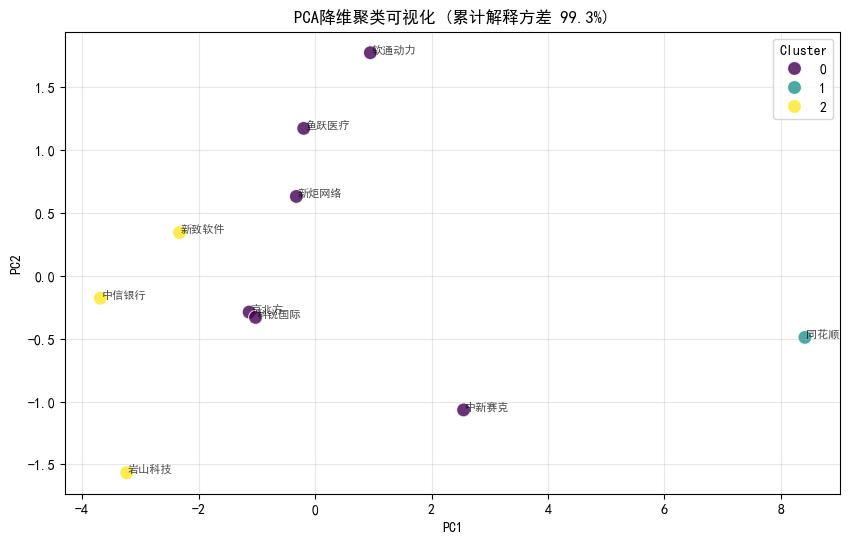

In [37]:
# 执行PCA降维
pca = PCA(n_components=2)
pca_features = pca.fit_transform(scaled_features)

# 创建可视化DataFrame
plot_df = pd.DataFrame({
    'PC1': pca_features[:,0],
    'PC2': pca_features[:,1],
    'Cluster': stats_df['cluster'],
    'Company': stats_df['company']
})

# 绘制PCA散点图
plt.figure(figsize=(10,6))
sns.scatterplot(data=plot_df, x='PC1', y='PC2', hue='Cluster', 
                palette='viridis', s=100, alpha=0.8)
plt.title("PCA降维聚类可视化 (累计解释方差 {:.1%})".format(pca.explained_variance_ratio_.sum()))
plt.grid(alpha=0.3)

# 添加公司标签
for line in range(0, plot_df.shape[0]):
    plt.text(plot_df.PC1[line]+0.02, plot_df.PC2[line], 
             plot_df.Company[line], horizontalalignment='left', 
             fontsize=8, color='black', alpha=0.7)

plt.show()